<a href="https://colab.research.google.com/github/moriomchi/DeepfakeDetection/blob/main/EfficientNetDeepfakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading The Dataset

In [ ]:
# installing kaggle API
!pip install kaggle


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
base_drive_path = "/content/drive/My Drive/deepfake_project"
dataset_path = f"{base_drive_path}/train_sample_videos"
metadata_path = f"{dataset_path}/metadata.json"
real_path = f"{base_drive_path}/real_videos"
fake_path = f"{base_drive_path}/fake_videos"
#subset of data to be processed:
small_real_path = f"{base_drive_path}/small_real_videos"
small_fake_path = f"{base_drive_path}/small_fake_videos"
ssim_output_dir = f"{base_drive_path}/ssim_masks"


In [ ]:
#making the directories:
import os

os.makedirs(real_path, exist_ok=True)
os.makedirs(fake_path, exist_ok=True)
os.makedirs(small_real_path, exist_ok=True)
os.makedirs(small_fake_path, exist_ok=True)
os.makedirs(ssim_output_dir, exist_ok=True)


In [ ]:
#installing kaggle API
!pip install kaggle


In [ ]:
#uploading kaggle.json
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariamasfcef","key":"86ccbc28d2fd75147f8cf66b25228656"}'}

In [ ]:
#configuring kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#downloading the DFDC dataset:
!kaggle competitions download -c deepfake-detection-challenge


deepfake-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
dataset_path = "/content/drive/My Drive/deepfake_project"
os.makedirs(dataset_path, exist_ok=True)

In [ ]:
!unzip -o deepfake-detection-challenge.zip -d "/content/drive/My Drive/deepfake_project"


Archive:  deepfake-detection-challenge.zip
  inflating: /content/drive/My Drive/deepfake_project/sample_submission.csv  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/aassnaulhq.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/aayfryxljh.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/acazlolrpz.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/adohdulfwb.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/ahjnxtiamx.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/ajiyrjfyzp.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/aktnlyqpah.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/alrtntfxtd.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/aomqqjipcp.mp4  
  inflating: /content/drive/My Drive/deepfake_project/test_videos/apedduehoy.mp4  
  inflating: /content/drive/My Drive/deepfake_pro

# Organize Dataset

In [ ]:
import os
dataset_path = "/content/drive/My Drive/deepfake_project/train_sample_videos"
metadata_path = os.path.join(dataset_path, "metadata.json")

print("Dataset directory exists:", os.path.exists(dataset_path))
print("Metadata file exists:", os.path.exists(metadata_path))
print("Dataset contents:", os.listdir(dataset_path) if os.path.exists(dataset_path) else "Not Found")


Dataset directory exists: True
Metadata file exists: True
Dataset contents: ['aagfhgtpmv.mp4', 'aapnvogymq.mp4', 'abarnvbtwb.mp4', 'abqwwspghj.mp4', 'acifjvzvpm.mp4', 'acqfdwsrhi.mp4', 'acxnxvbsxk.mp4', 'abofeumbvv.mp4', 'adylbeequz.mp4', 'acxwigylke.mp4', 'adhsbajydo.mp4', 'adohikbdaz.mp4', 'aczrgyricp.mp4', 'aelzhcnwgf.mp4', 'aettqgevhz.mp4', 'aevrfsexku.mp4', 'afoovlsmtx.mp4', 'aelfnikyqj.mp4', 'agdkmztvby.mp4', 'agqphdxmwt.mp4', 'agrmhtjdlk.mp4', 'ahbweevwpv.mp4', 'aipfdnwpoo.mp4', 'ahdbuwqxit.mp4', 'ahqqqilsxt.mp4', 'ahfazfbntc.mp4', 'ajwpjhrbcv.mp4', 'aknbdpmgua.mp4', 'aknmpoonls.mp4', 'ajqslcypsw.mp4', 'aklqzsddfl.mp4', 'aladcziidp.mp4', 'akzbnazxtz.mp4', 'akvmwkdyuv.mp4', 'alaijyygdv.mp4', 'akxoopqjqz.mp4', 'alninxcyhg.mp4', 'altziddtxi.mp4', 'amowujxmzc.mp4', 'andaxzscny.mp4', 'amaivqofda.mp4', 'alvgwypubw.mp4', 'aorjvbyxhw.mp4', 'anpuvshzoo.mp4', 'aneclqfpbt.mp4', 'arlmiizoob.mp4', 'apogckdfrz.mp4', 'aqpnvjhuzw.mp4', 'apgjqzkoma.mp4', 'arkroixhey.mp4', 'apatcsqejh.mp4', 'asdp

In [ ]:
import os
import json
import shutil

#loading metadata
with open(metadata_path, "r") as f:
    metadata = json.load(f)

#gathering real and fake video paths:
all_real_videos = [os.path.join(dataset_path, video) for video, info in metadata.items() if info["label"] == "REAL"]
all_fake_videos = [os.path.join(dataset_path, video) for video, info in metadata.items() if info["label"] == "FAKE"]

#creating a subset of training, validation, and  testing for each class
train_real = all_real_videos[:60]
val_real = all_real_videos[60:70]
test_real = all_real_videos[70:80]

train_fake = all_fake_videos[:60]
val_fake = all_fake_videos[60:70]
test_fake = all_fake_videos[70:80]


In [ ]:
def check_overlap(set1, set2, set3, set_name1, set_name2, set_name3):
    # Check for overlaps between each pair of sets
    overlap1_2 = set(set1) & set(set2)
    overlap1_3 = set(set1) & set(set3)
    overlap2_3 = set(set2) & set(set3)

    # Print results
    if overlap1_2:
        print(f"Overlap between {set_name1} and {set_name2}: {overlap1_2}")
    else:
        print(f"No overlap between {set_name1} and {set_name2}.")

    if overlap1_3:
        print(f"Overlap between {set_name1} and {set_name3}: {overlap1_3}")
    else:
        print(f"No overlap between {set_name1} and {set_name3}.")

    if overlap2_3:
        print(f"Overlap between {set_name2} and {set_name3}: {overlap2_3}")
    else:
        print(f"No overlap between {set_name2} and {set_name3}.")

# Check for overlaps between real video sets
print("Checking overlap for REAL videos:")
check_overlap(train_real, val_real, test_real, "train_real", "val_real", "test_real")

# Check for overlaps between fake video sets
print("\nChecking overlap for FAKE videos:")
check_overlap(train_fake, val_fake, test_fake, "train_fake", "val_fake", "test_fake")


Checking overlap for REAL videos:
No overlap between train_real and val_real.
No overlap between train_real and test_real.
No overlap between val_real and test_real.

Checking overlap for FAKE videos:
No overlap between train_fake and val_fake.
No overlap between train_fake and test_fake.
No overlap between val_fake and test_fake.


In [ ]:
# copying subset files to Google Drive
for video in train_real + val_real + test_real:
    shutil.copy(video, small_real_path)
for video in train_fake + val_fake + test_fake:
    shutil.copy(video, small_fake_path)

print(f"Training set: {len(train_real) + len(train_fake)} videos")
print(f"Validation set: {len(val_real) + len(val_fake)} videos")
print(f"Testing set: {len(test_real) + len(test_fake)} videos")


Training set: 120 videos
Validation set: 20 videos
Testing set: 17 videos


# Preprocessing Videos: Face Detection

In [ ]:
pip install retina-face


In [ ]:
from retinaface import RetinaFace
from skimage.metrics import structural_similarity as ssim
import cv2
import os
import numpy as np
from tqdm import tqdm


In [ ]:
from retinaface import RetinaFace
import os
import cv2
from tqdm import tqdm

def extract_largest_face(frame, detector):
    """Detect and return the largest face in a frame using RetinaFace."""
    faces = detector.detect_faces(frame)  # Detecting faces in the frame
    if not faces:
        return None  # no faces detected

    #finding the largest face based on area in the case there's more than 1 face
    largest_face = max(faces.values(), key=lambda face: (face['facial_area'][2] - face['facial_area'][0]) *
                                                       (face['facial_area'][3] - face['facial_area'][1]))
    x, y, w, h = largest_face['facial_area']
    cropped_face = frame[y:h, x:w]
    return cropped_face

def extract_frames_with_largest_face(video_path, output_dir, detector, frame_skip=2):
    """Extract and save frames containing the largest face using RetinaFace."""
    os.makedirs(output_dir, exist_ok=True)
    try:
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_idx = 0

        while frame_idx < frame_count:
            ret, frame = cap.read()
            if not ret:
                break

            if frame_idx % frame_skip == 0:
                largest_face = extract_largest_face(frame, detector)
                if largest_face is not None:
                    output_path = os.path.join(output_dir, f"frame_{frame_idx:04d}.jpg")
                    cv2.imwrite(output_path, largest_face)

            frame_idx += 1
        cap.release()
    except Exception as e:
        print(f"Error processing video {video_path}: {e}")

def process_videos(video_list, output_root, detector):
    """Process a list of videos to extract frames with the largest face."""
    for video_path in tqdm(video_list):
        video_name = os.path.basename(video_path).split('.')[0]
        output_dir = os.path.join(output_root, video_name)

        # skip if directory exists and contains processed frames
        if os.path.exists(output_dir) and len(os.listdir(output_dir)) > 0:
            print(f"Skipping already processed video: {video_name}")
            continue

        # ow, extract frames
        extract_frames_with_largest_face(video_path, output_dir, detector)

# initialize RetinaFace
detector = RetinaFace

# Paths to Subset Videos
video_list = train_real + train_fake + val_real + val_fake
output_root = "/content/drive/My Drive/deepfake_project/face_crops2"

# process videos
process_videos(video_list, output_root, detector)


  0%|          | 0/140 [00:00<?, ?it/s]

Skipping already processed video: abarnvbtwb
Skipping already processed video: aelfnikyqj
Skipping already processed video: afoovlsmtx
Skipping already processed video: agrmhtjdlk
Skipping already processed video: ahqqqilsxt
Skipping already processed video: ajqslcypsw
Skipping already processed video: anpuvshzoo


100%|██████████| 140/140 [33:29<00:00, 14.36s/it]


# Defining Dataset with Updated Augmentations

In [ ]:
!pip install albumentations

In [ ]:
# Paths to Subset Videos
video_list = train_real + train_fake + val_real + val_fake
output_root = "/content/drive/My Drive/deepfake_project/face_crops2"



In [ ]:
# Separate Frames Based on Metadata
real_crops = []
fake_crops = []
for video_path in video_list:
    video_name = os.path.basename(video_path).split('.')[0]
    label = 0 if video_path in train_real + val_real else 1  # 0 for real, 1 for fake
    crop_dir = os.path.join(output_root, video_name)

    if label == 0:
        real_crops.append(crop_dir)
    else:
        fake_crops.append(crop_dir)


In [ ]:
from albumentations import Compose, ImageCompression, GaussNoise, GaussianBlur, HorizontalFlip, PadIfNeeded, OneOf, RandomBrightnessContrast, FancyPCA, HueSaturationValue, ToGray, ShiftScaleRotate, Normalize
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import os


In [ ]:
 from albumentations import Resize
def create_train_transforms(size=300):
    return Compose([
        Resize(size, size),  #  all images are resized to 300x300
        ImageCompression(quality_lower=60, quality_upper=100, p=0.3),
        GaussNoise(p=0.1),
        GaussianBlur(blur_limit=3, p=0.05),
        HorizontalFlip(p=0.5),
        PadIfNeeded(min_height=size, min_width=size, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
        OneOf([
            RandomBrightnessContrast(p=0.5), FancyPCA(p=0.2), HueSaturationValue(p=0.2)
        ], p=0.7),
        ToGray(p=0.1),
        ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=5, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.3),
        Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

def create_val_transforms(size=300):
    return Compose([
        Resize(size, size),  # all images are resized to 300x300
        PadIfNeeded(min_height=size, min_width=size, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
        Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

In [ ]:
def cutmix(images, labels, alpha=0.4):
    lam = np.random.beta(alpha, alpha)
    batch_size = images.size()[0]
    rand_index = torch.randperm(batch_size).cuda()
    target_a = labels
    target_b = labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(images.size(), lam)
    images[:, :, bbx1:bbx2, bby1:bby2] = images[rand_index, :, bbx1:bbx2, bby1:bby2]
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (images.size()[-1] * images.size()[-2]))
    return images, target_a, target_b, lam

def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1.0 - lam)
    cut_w = int(W * cut_rat)  # Replace np.int with int
    cut_h = int(H * cut_rat)  # Replace np.int with int

    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2



In [ ]:

class DeepFakeDataset(torch.utils.data.Dataset):
    def __init__(self, root_dirs, labels, transforms=None):
        self.paths = []
        self.labels = []
        self.transforms = transforms

        # Gather all frame paths and their labels
        for root_dir, label in zip(root_dirs, labels):
            if os.path.exists(root_dir):
                for frame_path in sorted(os.listdir(root_dir)):
                    self.paths.append(os.path.join(root_dir, frame_path))
                    self.labels.append(label)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image_path = self.paths[idx]
        label = self.labels[idx]

        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {image_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transforms:
            image = self.transforms(image=image)['image']

        return image, torch.tensor(label, dtype=torch.float)


In [ ]:
# Separate REAL crops for training and validation
train_real_crops = real_crops[:len(train_real)]  # Use the first `len(train_real)` for training
val_real_crops = real_crops[len(train_real):]    # Use the rest for validation

# Separate FAKE crops for training and validation
train_fake_crops = fake_crops[:len(train_fake)]  # Use the first `len(train_fake)` for training
val_fake_crops = fake_crops[len(train_fake):]    # Use the rest for validation

# Combine to create training and validation datasets
train_crops = train_real_crops + train_fake_crops
train_labels = [0] * len(train_real_crops) + [1] * len(train_fake_crops)

val_crops = val_real_crops + val_fake_crops
val_labels = [0] * len(val_real_crops) + [1] * len(val_fake_crops)


In [ ]:
print(f"Training Set: {len(train_crops)} crops, {len(train_labels)} labels")
print(f"Validation Set: {len(val_crops)} crops, {len(val_labels)} labels")

# Optional: Check overlap between train and validation crops
overlap = set(train_crops) & set(val_crops)
if overlap:
    print(f"Overlap detected in train and validation crops: {overlap}")
else:
    print("No overlap between train and validation crops.")


Training Set: 120 crops, 120 labels
Validation Set: 20 crops, 20 labels
No overlap between train and validation crops.


In [ ]:
train_transforms = create_train_transforms()
val_transforms = create_val_transforms()
train_dataset = DeepFakeDataset(root_dirs=train_crops, labels=train_labels, transforms=train_transforms)
val_dataset = DeepFakeDataset(root_dirs=val_crops, labels=val_labels, transforms=val_transforms)


In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


# Training the Model

In [ ]:
import timm
from torch import nn, optim


In [ ]:
from tqdm import tqdm
import numpy as np
from torch.optim.lr_scheduler import OneCycleLR
import torch

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


In [ ]:
import torch
import torch.nn as nn
import timm
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm

# Load the model
model = timm.create_model('tf_efficientnet_b4_ns', pretrained=True)

# Access the in_features of the classifier
input_features = model.classifier.in_features

# Replace the classifier for binary classification
model.classifier = nn.Sequential(
    nn.Dropout(p=0.5),  # Add dropout for regularization
    nn.Linear(input_features, 1)  # Binary classification: 1 output
)

# Move the model to GPU
model = model.cuda()

# Define the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)

# Define the loss function
criterion = nn.BCEWithLogitsLoss()

# Define learning rate scheduler
scheduler = OneCycleLR(
    optimizer,
    max_lr=1e-4,  # Maximum learning rate
    steps_per_epoch=len(train_loader),
    epochs=15
)

# Training loop
for epoch in range(15):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/15", unit="batch") as pbar:
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda().unsqueeze(1)  # Move data to GPU

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            # Metrics
            train_loss += loss.item()
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Update progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    # Epoch summary
    train_accuracy = correct / total * 100
    print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation loop
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.cuda(), labels.cuda().unsqueeze(1)  # Move data to GPU

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Metrics
            val_loss += loss.item()
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (predictions == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = val_correct / val_total * 100
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1/15: 100%|██████████| 1130/1130 [05:58<00:00,  3.15batch/s, loss=0.335]


Epoch 1, Train Loss: 0.5669, Train Accuracy: 71.36%
Epoch 1, Validation Loss: 0.3244, Validation Accuracy: 87.20%


Epoch 2/15: 100%|██████████| 1130/1130 [05:51<00:00,  3.21batch/s, loss=0.00365]


Epoch 2, Train Loss: 0.1067, Train Accuracy: 96.13%
Epoch 2, Validation Loss: 0.5080, Validation Accuracy: 83.83%


Epoch 3/15: 100%|██████████| 1130/1130 [05:58<00:00,  3.15batch/s, loss=0.0177]


Epoch 3, Train Loss: 0.0428, Train Accuracy: 98.57%
Epoch 3, Validation Loss: 0.5130, Validation Accuracy: 84.06%


Epoch 4/15: 100%|██████████| 1130/1130 [05:56<00:00,  3.17batch/s, loss=0.018]


Epoch 4, Train Loss: 0.0277, Train Accuracy: 99.09%
Epoch 4, Validation Loss: 0.5948, Validation Accuracy: 81.83%


Epoch 5/15: 100%|██████████| 1130/1130 [05:57<00:00,  3.16batch/s, loss=1.77e-5]


Epoch 5, Train Loss: 0.0212, Train Accuracy: 99.17%
Epoch 5, Validation Loss: 1.0659, Validation Accuracy: 83.53%


Epoch 6/15: 100%|██████████| 1130/1130 [05:59<00:00,  3.15batch/s, loss=0.0262]


Epoch 6, Train Loss: 0.0167, Train Accuracy: 99.40%
Epoch 6, Validation Loss: 0.9326, Validation Accuracy: 75.96%


Epoch 7/15: 100%|██████████| 1130/1130 [05:57<00:00,  3.16batch/s, loss=0.0104]


Epoch 7, Train Loss: 0.0155, Train Accuracy: 99.52%
Epoch 7, Validation Loss: 0.5890, Validation Accuracy: 84.36%


Epoch 8/15: 100%|██████████| 1130/1130 [05:54<00:00,  3.19batch/s, loss=0.0174]


Epoch 8, Train Loss: 0.0085, Train Accuracy: 99.67%
Epoch 8, Validation Loss: 0.8738, Validation Accuracy: 80.56%


Epoch 9/15: 100%|██████████| 1130/1130 [05:53<00:00,  3.19batch/s, loss=4.67e-5]


Epoch 9, Train Loss: 0.0080, Train Accuracy: 99.73%
Epoch 9, Validation Loss: 0.7209, Validation Accuracy: 83.19%


Epoch 10/15: 100%|██████████| 1130/1130 [05:59<00:00,  3.14batch/s, loss=0.000737]


Epoch 10, Train Loss: 0.0059, Train Accuracy: 99.78%
Epoch 10, Validation Loss: 0.7600, Validation Accuracy: 83.99%


Epoch 11/15: 100%|██████████| 1130/1130 [05:58<00:00,  3.15batch/s, loss=3.42e-5]


Epoch 11, Train Loss: 0.0029, Train Accuracy: 99.93%
Epoch 11, Validation Loss: 0.8095, Validation Accuracy: 83.89%


Epoch 12/15: 100%|██████████| 1130/1130 [06:01<00:00,  3.13batch/s, loss=4.88e-5]


Epoch 12, Train Loss: 0.0024, Train Accuracy: 99.93%
Epoch 12, Validation Loss: 0.9774, Validation Accuracy: 82.79%


Epoch 13/15: 100%|██████████| 1130/1130 [05:57<00:00,  3.16batch/s, loss=1.54e-5]


Epoch 13, Train Loss: 0.0020, Train Accuracy: 99.94%
Epoch 13, Validation Loss: 0.8529, Validation Accuracy: 83.99%


Epoch 14/15: 100%|██████████| 1130/1130 [05:57<00:00,  3.17batch/s, loss=1.99e-5]


Epoch 14, Train Loss: 0.0016, Train Accuracy: 99.95%
Epoch 14, Validation Loss: 0.9607, Validation Accuracy: 83.46%


Epoch 15/15: 100%|██████████| 1130/1130 [05:57<00:00,  3.16batch/s, loss=1.24e-5]


Epoch 15, Train Loss: 0.0022, Train Accuracy: 99.89%
Epoch 15, Validation Loss: 0.9032, Validation Accuracy: 84.06%


# Saving and Evaluating the Model

In [ ]:
import os
import torch
checkpoints_dir = "/content/drive/My Drive/deepfake_project/checkpoints4"
os.makedirs(checkpoints_dir, exist_ok=True)
torch.save(model.state_dict(), f"{checkpoints_dir}/efficientnet_b4.pth")


In [ ]:
import torch
import timm

# Load the model
model = timm.create_model('tf_efficientnet_b4_ns', pretrained=False, num_classes=1)
model = model.cuda()

# Load the state_dict
state_dict = torch.load(f"{checkpoints_dir}/efficientnet_b4.pth")

# Adjust keys in the state_dict
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("classifier.1."):  # Adjust Sequential layer keys
        new_key = key.replace("classifier.1.", "classifier.")  # Match the current model's structure
    else:
        new_key = key
    new_state_dict[new_key] = value

# Load the adjusted state_dict into the model
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

# Evaluate on the validation set
all_labels = []
all_preds = []
val_loss = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        preds = torch.sigmoid(outputs).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

print("Evaluation complete.")


Evaluation complete.


In [ ]:
import numpy as np

# Convert predictions and labels to numpy arrays
all_preds = np.array(all_preds).ravel()
all_labels = np.array(all_labels).ravel()


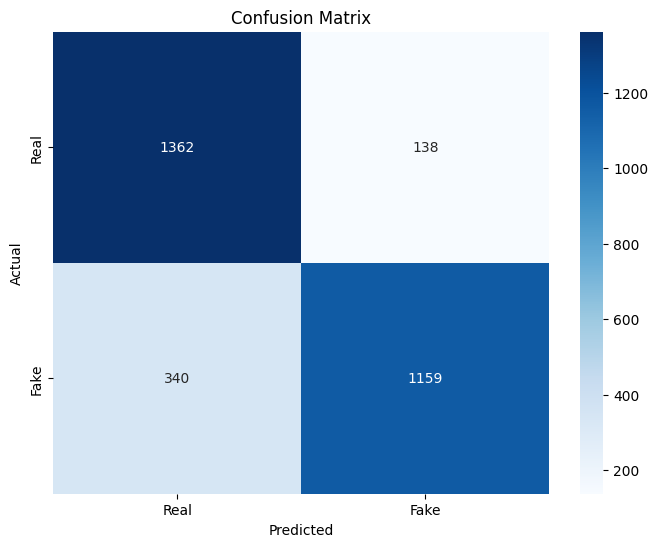

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute Confusion Matrix
threshold = 0.5
pred_classes = (all_preds >= threshold).astype(int)
cm = confusion_matrix(all_labels, pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig(f"{checkpoints_dir}/confusion_matrix.png")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Compute Classification Report
report = classification_report(all_labels, pred_classes, target_names=["Real", "Fake"], output_dict=True)
print("Classification Report:")
print(classification_report(all_labels, pred_classes, target_names=["Real", "Fake"]))

# Save Classification Report
with open(f"{checkpoints_dir}/classification_report.txt", "w") as f:
    f.write(classification_report(all_labels, pred_classes, target_names=["Real", "Fake"]))


Classification Report:
              precision    recall  f1-score   support

        Real       0.80      0.91      0.85      1500
        Fake       0.89      0.77      0.83      1499

    accuracy                           0.84      2999
   macro avg       0.85      0.84      0.84      2999
weighted avg       0.85      0.84      0.84      2999



In [ ]:
from sklearn.metrics import roc_curve, auc # Importing the necessary functions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)


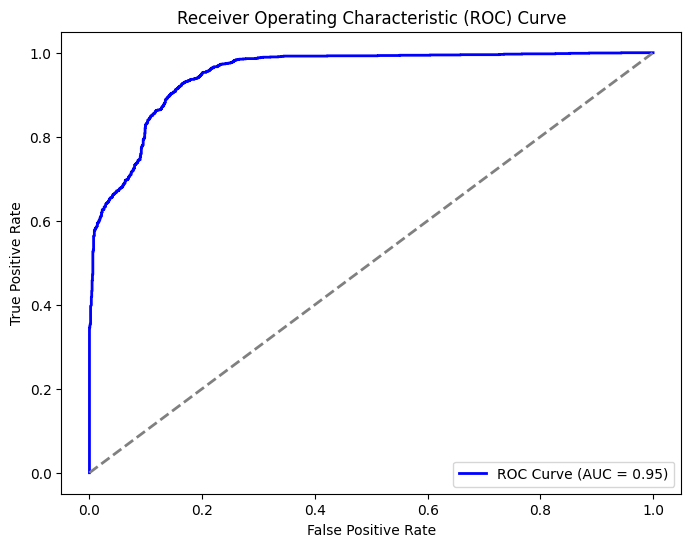

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig(f"{checkpoints_dir}/roc_curve.png")
plt.show()


In [ ]:
# Save Metrics Summary
metrics_summary = {
    "Accuracy": report["accuracy"],
    "Precision (Fake)": report["Fake"]["precision"],
    "Recall (Fake)": report["Fake"]["recall"],
    "F1-Score (Fake)": report["Fake"]["f1-score"],
    "ROC AUC": roc_auc
}
with open(f"{checkpoints_dir}/metrics_summary.txt", "w") as f:
    for key, value in metrics_summary.items():
        f.write(f"{key}: {value:.4f}\n")

# Print Summary
print("Metrics Summary:")
for key, value in metrics_summary.items():
    print(f"{key}: {value:.4f}")


Metrics Summary:
Accuracy: 0.8406
Precision (Fake): 0.8936
Recall (Fake): 0.7732
F1-Score (Fake): 0.8290
ROC AUC: 0.9503
